In [51]:
# initialization and start simulation

import sys
sys.path.append("../src/")

import datetime
import multi_armed_bandit as bandit


start_dt = datetime.datetime.now()
finish_dt = start_dt + datetime.timedelta(days=1)
step = 200 # step size (in seconds)
earns = 100 # multiplier characterizing how many points will be distributed in every step

arms_num = 10 # how many arms are there 
strategy_num = 3 # how many winning strategies can be selected

env = bandit.environment.Environment(start_dt, finish_dt, step, earns) # initialize environment

# initialize arms
for _ in range(arms_num):
    env.add_arm()

# initialize agent
agent = bandit.agent.Agent(strategy_num=strategy_num, verbose=0)
agent.run_optimization(env.run_bandit_sim, env.select_arms)

  0%|          | 0/432 [00:00<?, ?it/s]

In [52]:
# calculating metrics

import pandas as pd

df_rewards = env.rewards_report_df

def accuracy_calculation(x):
    select = x['selected_arms']
    best = x['best_arms']
    if (len(select) == 0) & (len(best) == 0):
        return 1
    return len(set(select).intersection(set(best)))/len(select)
    

df_rewards['absolute_loss'] = df_rewards['could_be_earned']-df_rewards['actual_earned']
df_rewards['relative_loss'] = df_rewards['absolute_loss']/df_rewards['could_be_earned']
df_rewards['accuracy'] = df_rewards[['selected_arms', 'best_arms']].apply(accuracy_calculation, axis=1)

total_abs_loss = sum(df_rewards['absolute_loss'])
total_rel_loss = sum(df_rewards['relative_loss'].dropna())
mean_accuracy = sum(df_rewards['accuracy'])/len(df_rewards['accuracy'])

print(f"Total absolute loss: {total_abs_loss}\nTotal relative loss: {total_rel_loss}\nMean accuracy: {mean_accuracy}")
df_rewards

Total absolute loss: 3948
Total relative loss: 5.903530417355141
Mean accuracy: 0.7961570593149524


,time_sec,actual_earned,could_be_earned,selected_arms,best_arms,absolute_loss,relative_loss,accuracy
0,3600,0,0,[],[],0,NaN,1.0
1,3800,389,389,[3],[3],0,0.0,1.0
2,4000,389,389,[3],[3],0,0.0,1.0
3,4200,385,385,[3],[3],0,0.0,1.0
4,4400,398,398,[3],[3],0,0.0,1.0
...,...,...,...,...,...,...,...,...
394,85400,1021,1021,"[5, 9, 1]","[9, 5, 1]",0,0.0,1.0
395,85600,1035,1035,"[5, 9, 1]","[9, 5, 1]",0,0.0,1.0
396,85800,995,995,"[5, 9, 1]","[9, 5, 1]",0,0.0,1.0
397,86000,994,994,"[5, 9, 1]","[9, 5, 1]",0,0.0,1.0


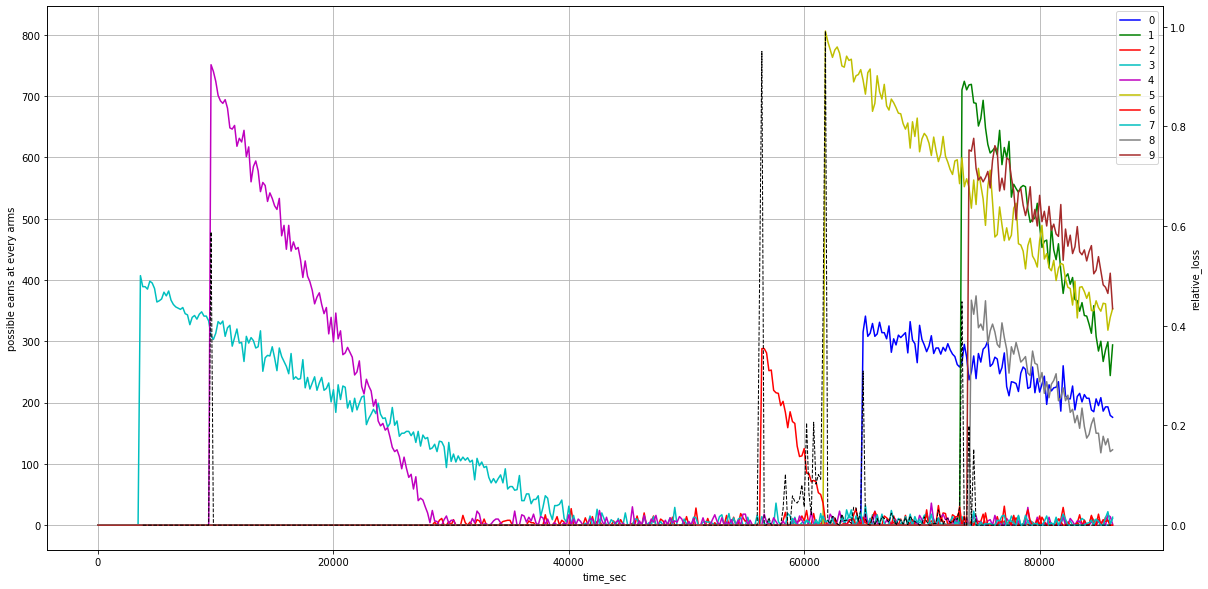

In [55]:
# plot the results

import matplotlib.pyplot as plt


def counter2columns(counter):
    return pd.Series([counter[i] for i in range(10)])

df_sim_result = env.simulation_report_df
df_sim_result[[str(i) for i in range(10)]] = df_sim_result['arm_reward_counter'].apply(counter2columns)
df_sim_result

ax = df_sim_result.plot(kind='line', color='b', x='time_sec', y='0', label="0", figsize=(20, 10));
ax.set_ylabel("possible earns at every arms")
clrs = ['b', 'g', 'r', 'c', 'm', 'y', 'r', 'c', 'gray', 'brown']

for i in range(1,10,1):
    df_sim_result.plot(kind='line', color=clrs[i], x='time_sec', y=str(i), label=str(i), ax=ax);
plt.grid()


ax2 = ax.twinx()
ax2.plot(df_rewards['time_sec'], df_rewards['relative_loss'], '--', color='black', linewidth=1, label='loss')
ax2.set_ylabel("relative_loss");